In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


In [2]:
data = pd.read_csv("../data/processed_data.csv")
data["date"] = pd.to_datetime(data["date"])
data.head()


,date,demand
0,2010-12-01,26814
1,2010-12-02,21023
2,2010-12-03,14830
3,2010-12-05,16395
4,2010-12-06,21419


In [3]:
data["time_index"] = np.arange(len(data))
data["month"] = data["date"].dt.month


In [4]:
X = data[["time_index", "month"]]
y = data["demand"]

seasonal_model = LinearRegression()
seasonal_model.fit(X, y)

data["seasonal_prediction"] = seasonal_model.predict(X)


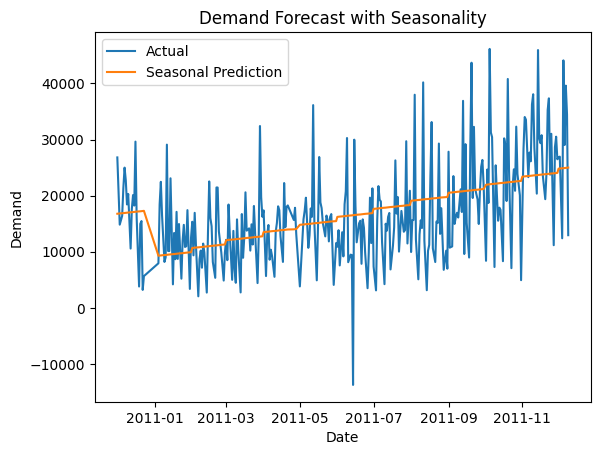

In [5]:
plt.figure()
plt.plot(data["date"], data["demand"], label="Actual")
plt.plot(data["date"], data["seasonal_prediction"], label="Seasonal Prediction")
plt.legend()
plt.title("Demand Forecast with Seasonality")
plt.xlabel("Date")
plt.ylabel("Demand")
plt.show()


In [6]:
# Mark festival-heavy months
festival_months = [11, 12]  # November, December

data["festival"] = data["month"].apply(lambda x: 1 if x in festival_months else 0)
data.head()


,date,demand,time_index,month,seasonal_prediction,festival
0,2010-12-01,26814,0,12,16771.941418,1
1,2010-12-02,21023,1,12,16799.012612,1
2,2010-12-03,14830,2,12,16826.083806,1
3,2010-12-05,16395,3,12,16853.155001,1
4,2010-12-06,21419,4,12,16880.226195,1


In [7]:
X = data[["time_index", "month", "festival"]]
y = data["demand"]

festival_model = LinearRegression()
festival_model.fit(X, y)

data["festival_prediction"] = festival_model.predict(X)


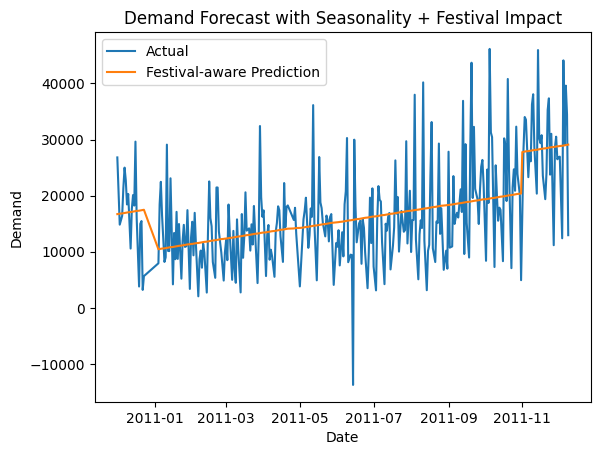

In [8]:
plt.figure()
plt.plot(data["date"], data["demand"], label="Actual")
plt.plot(data["date"], data["festival_prediction"], label="Festival-aware Prediction")
plt.legend()
plt.title("Demand Forecast with Seasonality + Festival Impact")
plt.xlabel("Date")
plt.ylabel("Demand")
plt.show()
